In [1]:
from IPython.display import Image

# augmentation



### Flipping

Flip은 이미지를 대칭하는 기능입니다. 우리가 거울을 보면 반전이 되듯이 좌우 또는 상하로 이미지를 반전시키는 방법입니다. '

분류 문제에서는 문제가 없을 수 있지만 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 합니다.

만약 숫자나 알파벳 문자를 인식(recognition)하는 문제에 적용할 때도 주의해야 할 것입니다. 상하나 좌우가 반정될 경우 다른 글자가 될 가능성이 있으니까요.

![title](https://d3s0tskafalll9.cloudfront.net/media/images/gc-2-l-flip.max-800x600.png)

### Saturation

Saturation은 RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용, 조금 더 이미지를 선명하게 만들어 줍니다. 
이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해줍니다.
![title](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-5.max-800x600.png)

### Brightness

밝기를 조절할 수도 있습니다. 우리가 주로 사용하는 RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미합니다. 따라서 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워집니다. 이를 통해서 Brightness를 변경할 수 있습니다.
![title](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-6.max-800x600.png)

### Rotation

Rotation은 이미지의 각도를 변환해 줍니다. 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해 주면 바로 사용할 수 있습니다. 하지만 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 합니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-7.max-800x600.png)

### Center Crop

Center crop은 이미지의 중앙을 기준으로 확대하는 방법입니다. 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요합니다. 예를 들어 고양이 라벨의 이미지를 확대해 한 장 더 만들어내려면, 이미지 내에 고양이의 형상을 유지해야 하고 털만 보이는 이미지를 만들어서는 안 됩니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-8.max-800x600.png)

In [2]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

이미지를 불러와 적절히 리사이징 해줍니다. 저는 500x400으로 크기를 조절해 주었습니다.

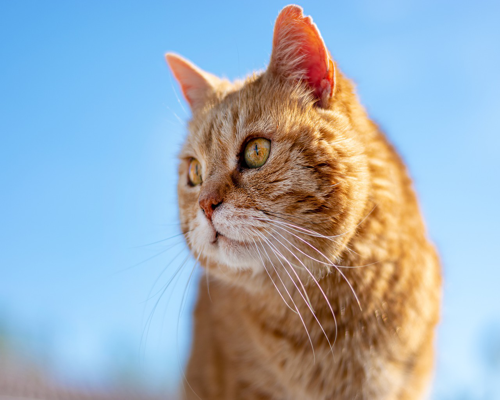

In [3]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

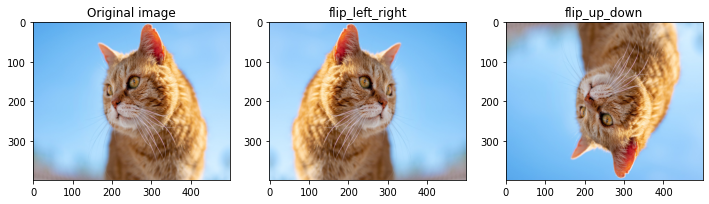

In [8]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

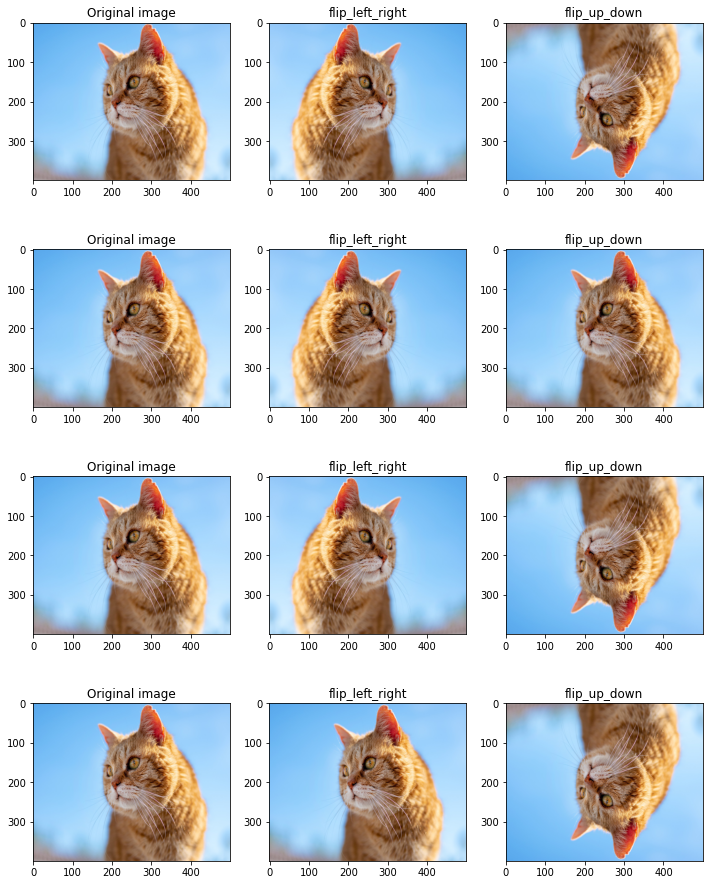

In [10]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

Center crop은 이전에 설명드렸던 것과 같이 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법입니다.

단순하게 중심점을 기준으로 사진을 확대하는 것으로 생각하기 쉽지만, 적용할 때 주의해 사용해야 합니다.

central_fraction은 얼마나 확대를 할지를 조절하는 매개변수입니다. 1.0인 경우는 원본 이미지와 같습니다.

그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있습니다. 

따라서 central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 합니다.

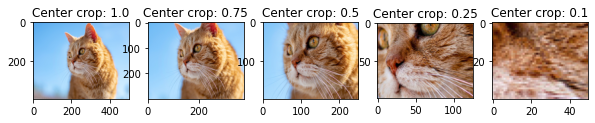

In [11]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤하게 centeral_crop을 적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않습니다. 

그렇다면 어떻게 만들 수 있을까요? 파이썬의 random 모듈을 사용하셔도 되고 텐서플로우의 랜덤 모듈을 사용하셔도 됩니다.

아래는 tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수입니다.

In [12]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


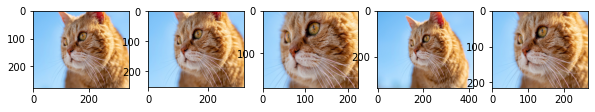

In [13]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## 직접구현

### tf.image.random_crop()

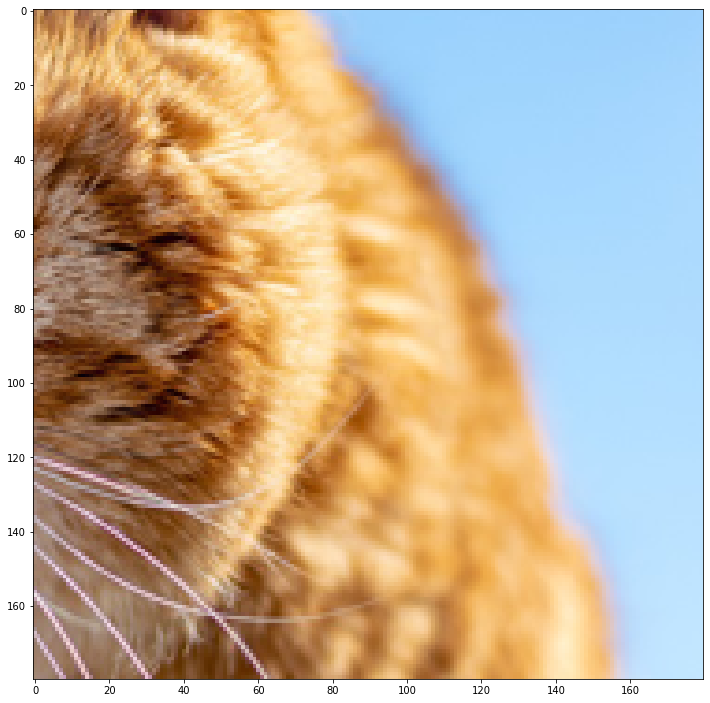

In [14]:
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

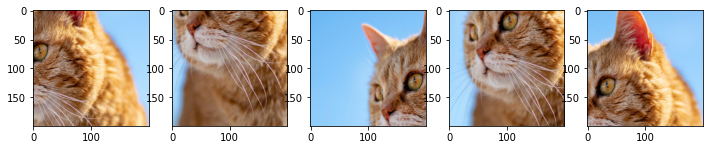

In [16]:
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

### tf.image.random_brightness()

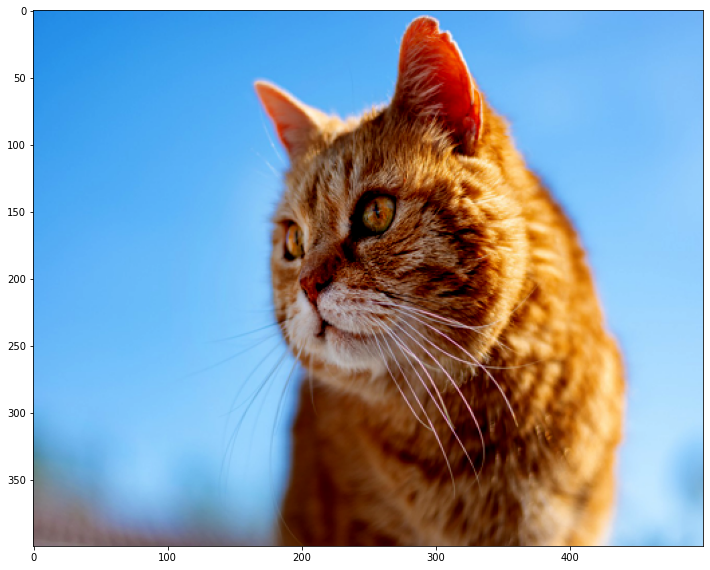

In [17]:
# apply random_brightness on cat image
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

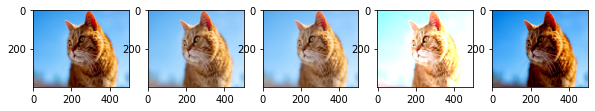

In [18]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## imgaug 사용하기

In [19]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

### iaa.Affine()


이제 위에서 확인해보지 않았던 augmentation 중 하나를 해봅시다. 

imgaug.augmenters의 Affine()은 아핀 변환(Affine transform)을 이미지에 적용합니다. 

2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있습니다. 

자세한 내용은 아래 참고 자료를 확인해 보세요.

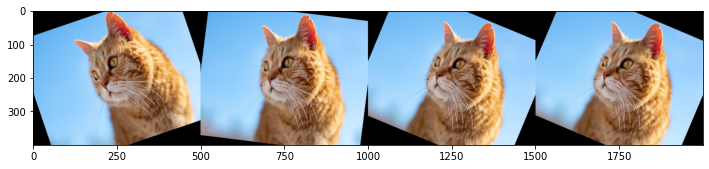

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Crop()

이번에는 텐서플로우 API로 사용했던 crop 기법을 적용해 보겠습니다. Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지를 생성합니다.

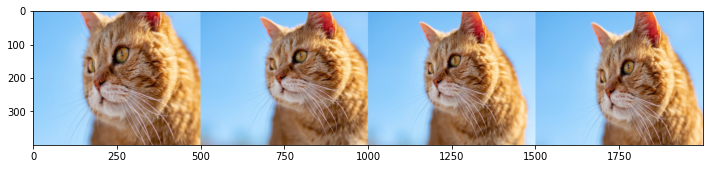

In [25]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sequential()

이렇게 하나씩 기법을 적용하다 보면 "augmentation 기법들을 한 번에 조합하여 사용할 수는 없을까?" 라는 생각이 듭니다. 

imgaug에서는 iaa.Sequential를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다. 

아래 코드에서는 위에서 사용한 rotate와 crop이 적용된 결과를 볼 수 있습니다.

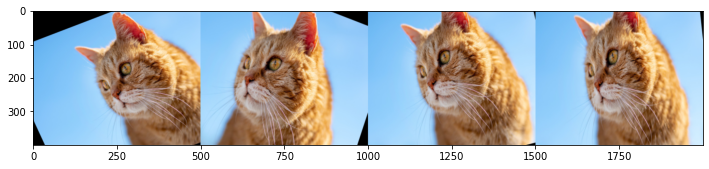

In [26]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

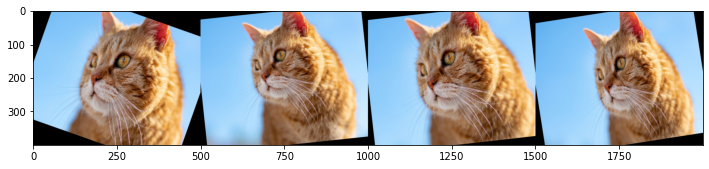

In [27]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

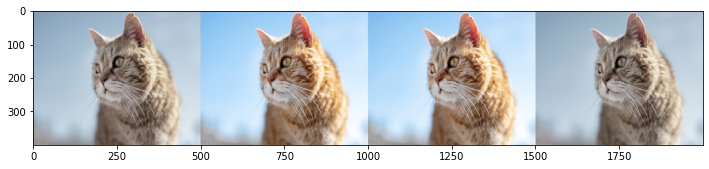

In [28]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

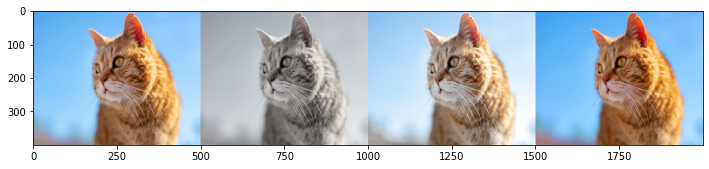

In [29]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

iaa.Sequntial()과 iaa.OneOf(), iaa.Sometimes() 등 각종 augmentation 기법을 활용하면 매우 다양한 조합을 만들어 낼 수 있습니다. 

개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어 봅시다. 

이때 조합될 수 있는 가짓수는 1024가지가 넘도록 해보세요! 시각화는 100장을 하도록 합시다.

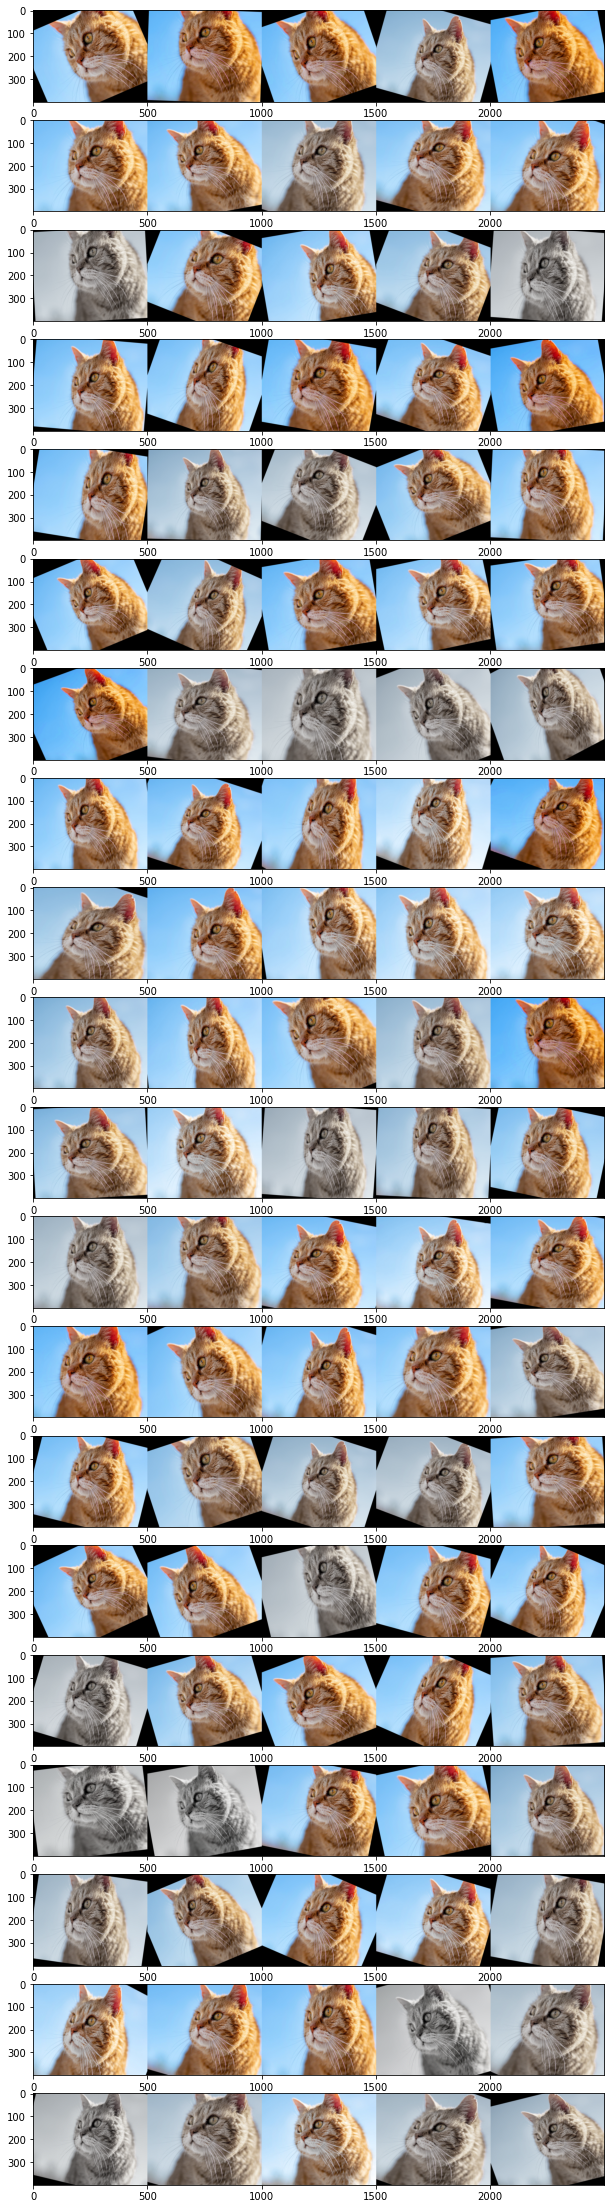

In [30]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])ß

plt.figure(figsize=(12, ßß40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()